list then numpy arrays then tensors so they are similar <br>
Tensor is a multi-dimesnional matrix containing elments of single data type.
Defualt data type of them is float32

In [1]:
import torch 
import numpy as np

In [3]:
#List
myList = [1,2,3,4,5]
print(myList)
myListMultiDimesnional = [[1,2,3,4,5],[6,7,8,9,10]]
print(myListMultiDimesnional)

[1, 2, 3, 4, 5]
[[1, 2, 3, 4, 5], [6, 7, 8, 9, 10]]


In [5]:
#NumpyArrays

np1 = np.random.rand(3,4)
print(np1)
print(np1.dtype)

[[0.19570932 0.33276843 0.39822868 0.73884307]
 [0.29003019 0.95266184 0.53213065 0.02093816]
 [0.93716338 0.64835547 0.88048725 0.27574097]]
float64


In [21]:
#Tensors
tensor_2d = torch.randn(3,4)
print(tensor_2d)
print(tensor_2d.dtype)
tensor_3d = torch.zeros(2,3,4)
print(tensor_3d)
tensorNew = tensor.new_full((2,2),7)
print(tensorNew)

tensor([[ 0.4384,  0.1136,  0.0681, -0.9303],
        [-0.6451,  0.6323,  0.6631, -0.5323],
        [ 1.4850,  1.4204, -0.3791, -0.7213]])
torch.float32
tensor([[[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]],

        [[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]]])
tensor([[7., 7.],
        [7., 7.]], dtype=torch.float64)
tensor(1.4850)


In [10]:
#Create Tensor form Numopy Array
tensorFromNumpy = torch.tensor(np1)
print(tensor)
tensorFromList = torch.tensor(myListMultiDimesnional)
print(tensorFromList)

tensor([[0.1957, 0.3328, 0.3982, 0.7388],
        [0.2900, 0.9527, 0.5321, 0.0209],
        [0.9372, 0.6484, 0.8805, 0.2757]], dtype=torch.float64)
tensor([[ 1,  2,  3,  4,  5],
        [ 6,  7,  8,  9, 10]])


In [37]:
#Manipulation of Tensor just like List
print(tensorFromList[0][1])
tensorFromList[0][1] =90
print(tensorFromList[0][1])
print(tensorFromList[0][1].item()) #Tp print just the value not the tensor word
print(tensorFromList.amax()) #Print Maximum value
print(tensorFromList.amin()) #Print Minimum value
print(tensorFromList.argmin()) #Print Minimum value Index
print(tensorFromList.argmax()) #Print Maximum value Index
print("\n",tensorFromList)
tensorFromList[:,1] #Slicing

tensor(90)
tensor(90)
90
tensor(90)
tensor(1)
tensor(0)
tensor(1)

 tensor([[ 1, 90,  3,  4,  5],
        [ 6,  7,  8,  9, 10]])


tensor([90,  7])

In [34]:
#Reshape and Shallow Copy
myTensor = torch.arange(10)
print(myTensor)
myTensor = myTensor.reshape(2,5)
print(myTensor)
myTensor = myTensor.reshape(5,-1) #Telling I need 5 rows, adjust column accordingly
print(myTensor)

myTensor2 = myTensor #Shallow Copy
print(myTensor2)
myTensor[1][1]=22
print()
print(myTensor)
print(myTensor2)


tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
tensor([[0, 1, 2, 3, 4],
        [5, 6, 7, 8, 9]])
tensor([[0, 1],
        [2, 3],
        [4, 5],
        [6, 7],
        [8, 9]])
tensor([[0, 1],
        [2, 3],
        [4, 5],
        [6, 7],
        [8, 9]])

tensor([[ 0,  1],
        [ 2, 22],
        [ 4,  5],
        [ 6,  7],
        [ 8,  9]])
tensor([[ 0,  1],
        [ 2, 22],
        [ 4,  5],
        [ 6,  7],
        [ 8,  9]])


In [51]:
#Math Operations
tensorA = torch.tensor([1,2,3])
tensorB = torch.tensor([3,2,1])

#Element wise
print(tensorA + tensorB)
print(tensorA - tensorB)
print(tensorA * tensorB)
print(tensorA / tensorB)
print(tensorA // tensorB) #Integer Division
print(tensorA % tensorB) #Remainder
print(torch.pow(tensorA,5))
tensorA+=tensorB
print(tensorA)
print(tensorB)


tensor([4, 4, 4])
tensor([-2,  0,  2])
tensor([3, 4, 3])
tensor([0.3333, 1.0000, 3.0000])
tensor([0, 1, 3])
tensor([1, 0, 0])
tensor([  1,  32, 243])
tensor([4, 4, 4])
tensor([3, 2, 1])


In [35]:
#SimpleNeuralNetwork
import torch.nn as nn
import torch.nn.functional as F


#Create a Model Class that inherits nn.Module

class MySimpleNN (nn.Module):
    
    #Inpur Layer (4 features) ----> Hidden Layer 1 ----> Hidden Layer 2----> Output Layer (3 features as 3 classes)  
    
    def __init__(self,inputFeatures=4,H1=8,H2=16,OutFeatures=3):
        super().__init__() #Instantiate nn.Module
        self.FC1 = nn.Linear(inputFeatures,H1) #1st Hidden Layer
        self.FC2 = nn.Linear(H1,H2) #2nd Hidden Layer
        self.out = nn.Linear(H2,OutFeatures) #Output Layer
    
    def forward(self,x):
        x =  F.relu(self.FC1(x)) #Activation Function of first Layer
        x = F.relu(self.FC2(x)) #Activation Function of first Layer
        x = self.out(x)
        
        return x

In [4]:
torch.manual_seed(41)
model = MySimpleNN()

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

In [10]:
url = 'https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv'
irisDataframe = pd.read_csv(url)


In [11]:
irisDataframe

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


In [18]:
print(irisDataframe["variety"].unique())
irisDataframe["variety"].value_counts()


['Setosa' 'Versicolor' 'Virginica']


Setosa        50
Versicolor    50
Virginica     50
Name: variety, dtype: int64

In [22]:
X = irisDataframe.drop(["variety"],axis=1).values
Y = irisDataframe["variety"].values

In [27]:
print(X.shape,Y.shape)

(150, 4) (150,)


In [26]:
from sklearn.model_selection import train_test_split #As Pytorch doesnt have random split built-in function
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=41)


C:\Users\Lenovo\anaconda3\envs\dataml100\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [54]:
#As this numpy array PyTorch wont take it, convert it to Tensor of Pytorch
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)

''' We can't use One hot encoder , it is the best choice as there is no ranking between outputs but crossentropyloss
in pytorch doesnt take that, so we use simple label encoder

from sklearn.preprocessing import OneHotEncoder
pre_y_train = np.array(y_train).reshape(-1, 1)
encoder = OneHotEncoder(sparse=False)
encoded_y_train = encoder.fit_transform(pre_y_train)
pre_y_test = np.array(y_test).reshape(-1, 1)
encoded_y_test = encoder.transform(pre_y_test)
print(encoded_y_train,"\n\n",encoded_y_test)
'''
from sklearn.preprocessing import LabelEncoder
output_label_encoder = LabelEncoder()
y_train = output_label_encoder.fit_transform(y_train)
y_test = output_label_encoder.transform(y_test)

y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [31]:
#Set Criteria to measure the Error
criterion = nn.CrossEntropyLoss()
# Choose Optimizer and Learning Rate
optimizer = torch.optim.Adam(model.parameters(),lr=0.01)

In [33]:
model.parameters

<bound method Module.parameters of MySimpleNN(
  (FC1): Linear(in_features=4, out_features=8, bias=True)
  (FC2): Linear(in_features=8, out_features=16, bias=True)
  (out): Linear(in_features=16, out_features=3, bias=True)
)>

## Train Model

Epich: 0 and loss :0.001454610493965447
Epich: 10 and loss :0.0013603976694867015
Epich: 20 and loss :0.0012743633706122637
Epich: 30 and loss :0.0011956423986703157
Epich: 40 and loss :0.0011234716512262821
Epich: 50 and loss :0.0010572012979537249
Epich: 60 and loss :0.0009962328476831317
Epich: 70 and loss :0.0009400613489560783
Epich: 80 and loss :0.0008882341207936406
Epich: 90 and loss :0.0008403113461099565
Epich: 100 and loss :0.0007959598442539573
Epich: 110 and loss :0.0007548260618932545
Epich: 120 and loss :0.0007166391587816179
Epich: 130 and loss :0.000681722944136709
Epich: 140 and loss :0.0006484252517111599
Epich: 150 and loss :0.0006176317110657692
Epich: 160 and loss :0.0005888607702217996
Epich: 170 and loss :0.0005619461880996823
Epich: 180 and loss :0.0005367548437789083
Epich: 190 and loss :0.0005131493671797216
Epich: 200 and loss :0.0004910003626719117


Text(0, 0.5, 'Error')

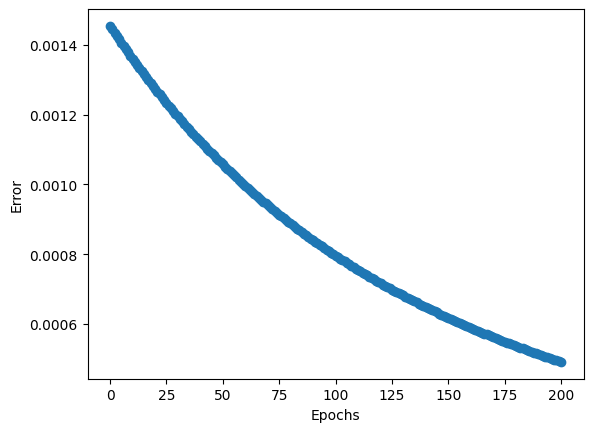

In [61]:

#First Determine Epochs

epochs = 201
losses = []
for i in range (epochs):
    #Go Forward a get a prediction
    y_pred = model.forward(X_train)
    #Measure the loss/error
    loss = criterion(y_pred,y_train)
    
    #Keep Track of Losses
    losses.append(loss.item())
    
    #Print ebery 10 epochs
    if i % 10==0:
       print(f"Epich: {i} and loss :{loss}") 
    
    #Do BackPropagation
    optimizer.zero_grad() #Resets the gradients 
    loss.backward() 
    optimizer.step() #Update the weights
    
    

plt.scatter(range(epochs),y=losses)
plt.xlabel("Epochs")
plt.ylabel("Error")

## Evaluate Test Data

In [104]:
with torch.no_grad(): #Turn Off Back Propagation by disabling gradient calculation.
    y_eval = model.forward(X_test) #As test set is small so we give it once instead of batches same for training set
    loss = criterion(y_eval,y_test) 
    
    print(loss.item())

0.368821918964386


In [99]:
with torch.no_grad(): 
    sum=0
    for i,data in enumerate(X_test):
        y_eval = model.forward(data)
        print(f'Model Prediction {y_eval}  , Original {y_test[i]} , {y_eval.argmax().item()==y_test[i]}')
        if(y_eval.argmax().item()==y_test[i]):
            sum+=1

Model Prediction tensor([-6.9974,  1.2256,  9.0280])  , Original 2 , True
Model Prediction tensor([-12.7871,  -7.8338,  23.7496])  , Original 2 , True
Model Prediction tensor([-13.4140,  -6.7662,  24.0348])  , Original 2 , True
Model Prediction tensor([-1.2847, 10.3425, -6.0164])  , Original 1 , True
Model Prediction tensor([-11.1720,  -4.1564,  19.0196])  , Original 2 , True
Model Prediction tensor([  1.4311,  12.7110, -12.7414])  , Original 1 , True
Model Prediction tensor([-7.0380,  1.8504,  8.6829])  , Original 2 , True
Model Prediction tensor([-1.7619,  9.9532, -4.8717])  , Original 1 , True
Model Prediction tensor([-9.5789, -1.8902, 15.0643])  , Original 2 , True
Model Prediction tensor([-13.9663,  -9.1922,  26.4650])  , Original 2 , True
Model Prediction tensor([-7.0570,  1.7140,  8.8007])  , Original 2 , True
Model Prediction tensor([ 23.4357,  12.4419, -47.3034])  , Original 0 , True
Model Prediction tensor([ 21.6106,  11.2725, -43.4133])  , Original 0 , True
Model Prediction 

In [101]:
print(f"Total Correct Answers {sum}, out of {i+1}")

Total Correct Answers 42, out of 45


In [94]:
from sklearn.metrics import classification_report,confusion_matrix
y_evalList = y_eval.argmax(dim=1).tolist()
print(classification_report(y_test,y_evalList))
print(confusion_matrix(y_test,y_evalList))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.94      0.89      0.91        18
           2       0.88      0.94      0.91        16

    accuracy                           0.93        45
   macro avg       0.94      0.94      0.94        45
weighted avg       0.93      0.93      0.93        45

[[11  0  0]
 [ 0 16  2]
 [ 0  1 15]]


### Test New Data Point

In [102]:
newData = torch.tensor([5.9,3.0,5.1,1.8])
with torch.no_grad(): #Turn Off Back Propagation by disabling gradient calculation.
    y_eval = model.forward(newData)
    print(y_eval.argmax().item())

2


#### Save Model

In [105]:
torch.save(model.state_dict(),'myModelSave.pt')

#### Load Model

In [110]:
newModel  = MySimpleNN()

params = newModel.parameters()
# Extract the weights of the first layer
first_layer_weights = next(params)
print(first_layer_weights)


newModel.load_state_dict(torch.load('myModelSave.pt'))

Parameter containing:
tensor([[ 0.0441,  0.4588,  0.1440,  0.1187],
        [-0.2158,  0.3161, -0.3678,  0.2471],
        [ 0.0794,  0.4815,  0.3981,  0.4491],
        [ 0.2611, -0.1574, -0.0782,  0.3387],
        [ 0.4676,  0.2054,  0.4763, -0.2112],
        [ 0.3026, -0.4809, -0.3279,  0.2684],
        [ 0.4784,  0.3145,  0.3822, -0.3655],
        [-0.4630,  0.2467, -0.3159, -0.4742]], requires_grad=True)


<All keys matched successfully>

In [111]:
#Checking if Saved model weights loaded successfully
params = newModel.parameters()
# Extract the weights of the first layer
first_layer_weights = next(params)
print(first_layer_weights)

Parameter containing:
tensor([[-0.2636, -0.2734,  0.3005, -0.3308],
        [-0.2350,  0.2720, -0.3718,  0.2452],
        [ 0.5948,  0.1442,  0.6883,  1.1152],
        [ 0.3899,  0.2145, -0.6668, -0.5334],
        [ 0.6499,  0.3440, -0.6617, -1.3074],
        [-0.4415,  0.3314, -0.0434,  0.3445],
        [ 0.5310,  0.3316, -0.6633, -0.8873],
        [-0.3208, -0.1111,  0.2972, -0.2723]], requires_grad=True)
